# Sales Dataset: EDA and Regression

A Sales Dataset. This project I will attempt to a analyze and visualize the sales dataset to find some interesting sales insight. I will also build a model for segmentation and prediction of price.

| 📂 Column            | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| Date                 | Date of the transaction.                                                    |
| Gender               | Gender of the customer.                                                     |
| Age                  | Age of the customer at the time of purchase.                                |
| Product Category     | Category of the purchased item (e.g., Beauty, Clothing, Electronics).       |
| Quantity             | Number of units purchased in the transaction.                               |
| Price per Unit       | Cost of one item in the selected category.                                  |
| Total Amount         | Total amount spent (Quantity × Price per Unit).                             |


Per suggested exploration questions:
- Analyze spending patterns by gender or age group.

- Track most popular product categories over time.

- Predict total amount spent based on customer features.

- Identify seasonal or monthly spikes in certain categories.

I will also add one of my owns:
- Customer Segmentation

In [307]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Preprocess
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from utils.my_utils import CyclicalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [308]:
data = pd.read_csv('Sales Dataset.csv', parse_dates=['Date'], index_col='Date')
df = data.copy()
df = df.drop(df.columns[0], axis=1)
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,
2023-11-24,Male,34,Beauty,3,50,150
2023-02-27,Female,26,Clothing,2,500,1000
2023-01-13,Male,50,Electronics,1,30,30
2023-05-21,Male,37,Clothing,1,500,500
2023-05-06,Male,30,Beauty,2,50,100


## Data Overview

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-11-24 to 2023-04-12
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            1000 non-null   object
 1   Age               1000 non-null   int64 
 2   Product Category  1000 non-null   object
 3   Quantity          1000 non-null   int64 
 4   Price per Unit    1000 non-null   int64 
 5   Total Amount      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 54.7+ KB


In [310]:
df.describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


In [311]:
df.isna().sum()

Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [312]:
df.duplicated().sum()

np.int64(89)

In [313]:
df[df.duplicated()]

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,
2023-02-17,Male,22,Clothing,3,300,900
2023-04-19,Female,27,Beauty,3,25,75
2023-09-18,Female,21,Beauty,2,300,600
2023-11-08,Male,64,Electronics,4,30,120
2023-10-24,Male,61,Clothing,1,25,25
...,...,...,...,...,...,...
2023-12-19,Female,46,Beauty,3,30,90
2023-08-29,Male,56,Clothing,1,500,500
2023-05-28,Female,63,Clothing,3,25,75


There is not really a duplicated here.

In [314]:
df.shape

(1000, 6)

## EDA

Per suggested exploration questions:
- Analyze spending patterns by gender or age group.

- Track most popular product categories over time.

- Predict total amount spent based on customer features.

- Identify seasonal or monthly spikes in certain categories.

I will also add one of my owns:
- Customer Segmentation

In [315]:
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,
2023-11-24,Male,34,Beauty,3,50,150
2023-02-27,Female,26,Clothing,2,500,1000
2023-01-13,Male,50,Electronics,1,30,30
2023-05-21,Male,37,Clothing,1,500,500
2023-05-06,Male,30,Beauty,2,50,100


In [316]:
bins = [-np.inf, 18, 34, 55, np.inf]
labels = ['child', 'adult', 'old adult', 'old']
df['age_group'] = pd.cut(
    df['Age'], bins=bins, labels=labels
)
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,age_group
Date,,,,,,,
2023-11-24,Male,34,Beauty,3,50,150,adult
2023-02-27,Female,26,Clothing,2,500,1000,adult
2023-01-13,Male,50,Electronics,1,30,30,old adult
2023-05-21,Male,37,Clothing,1,500,500,old adult
2023-05-06,Male,30,Beauty,2,50,100,adult


In [317]:
df['year'] = df.index.year
df['month'] = df.index.month
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()

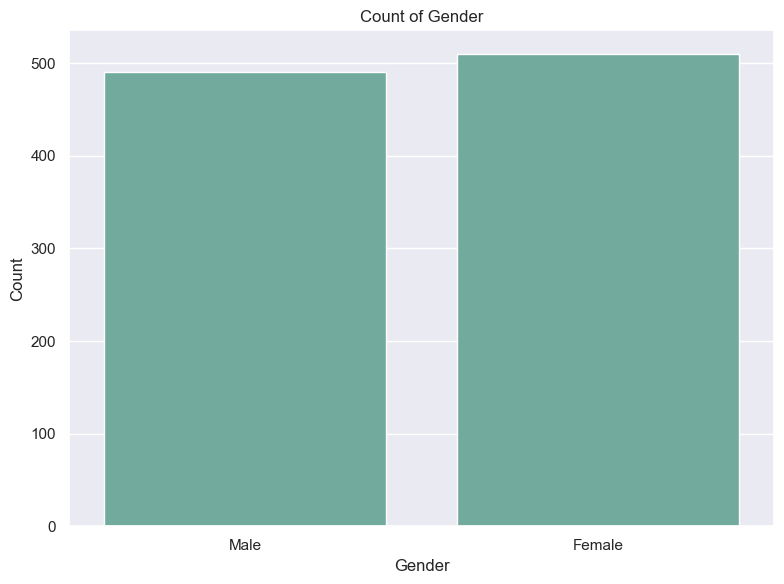

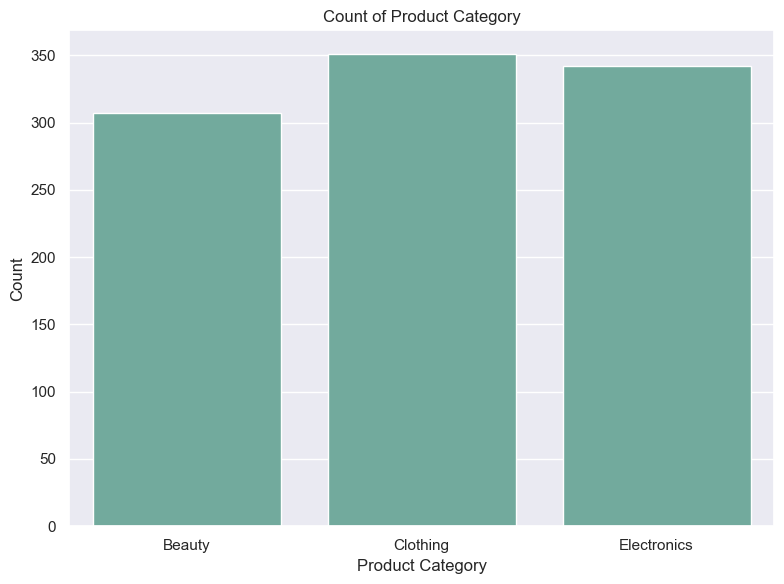

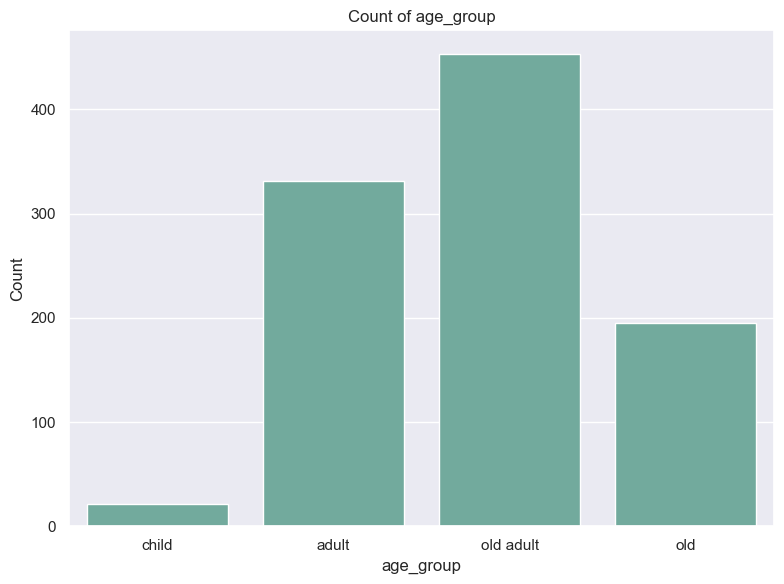

In [318]:
# Univariate Analysis
for col in categorical_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df[[col]], x=col, color='#69b3a2')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count of {col}')
    plt.tight_layout()

- Gender: Female is slightly higher than Male
- Product Category: Clothing is the most popular, followed by Electronics and Beauty, respectively.
- Adult (18-34) and Old Adult (34-55) are the top 2 and top 1 highest cluster of buying counts.

&rarr; A combination of Female and Clothing can contributes to high sales.

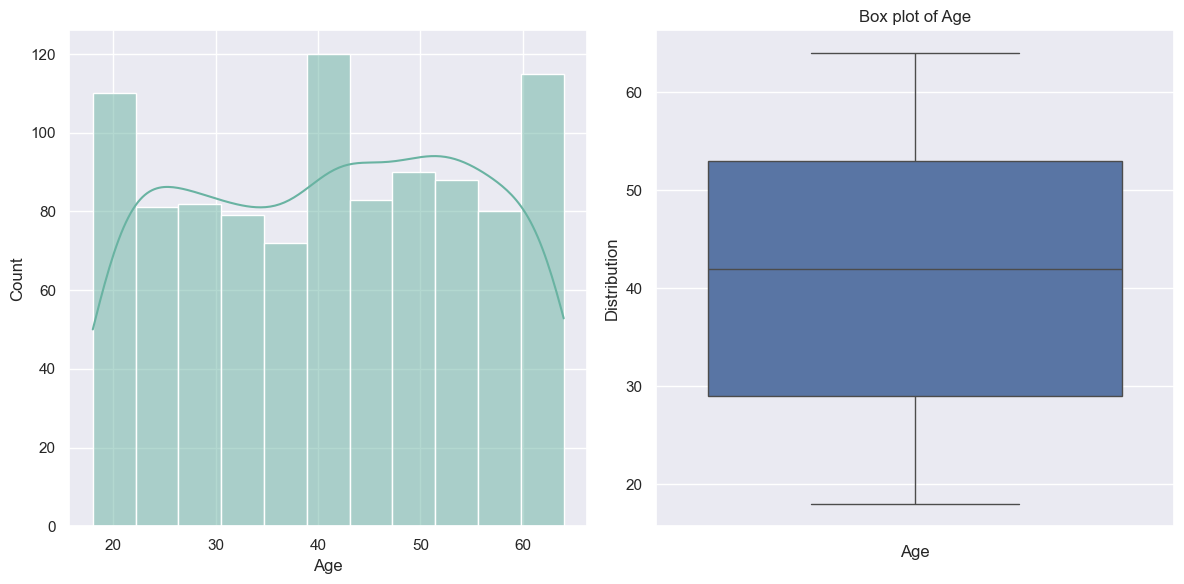

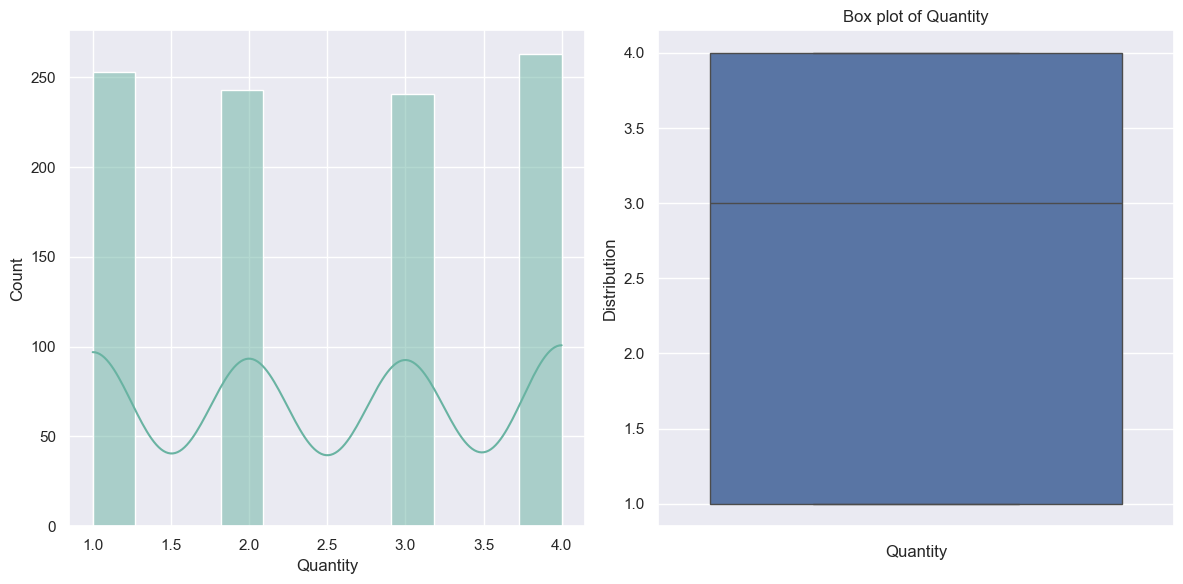

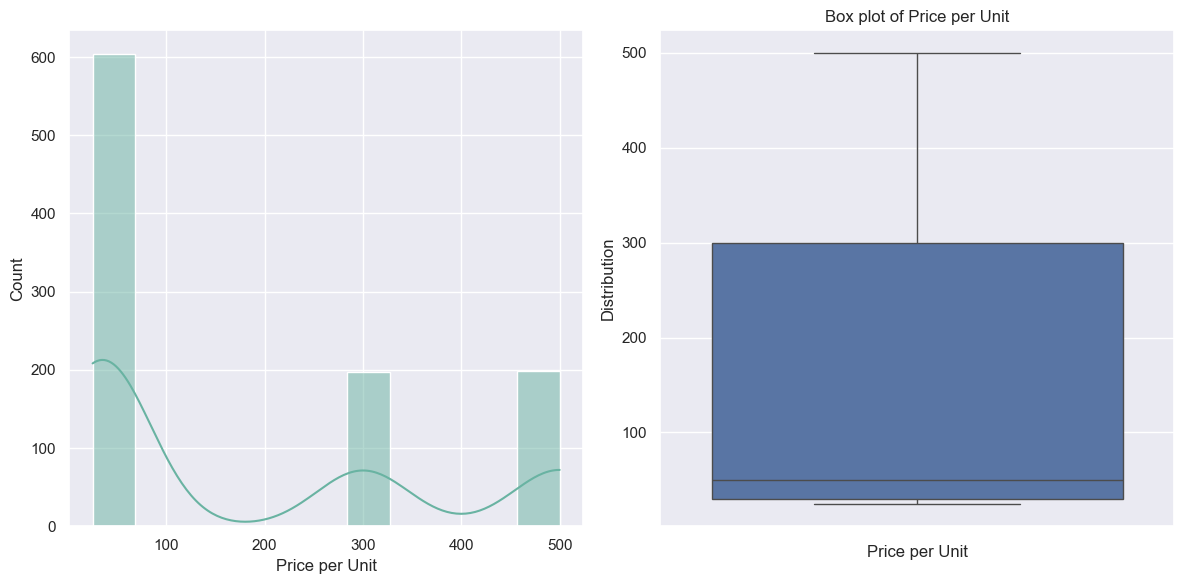

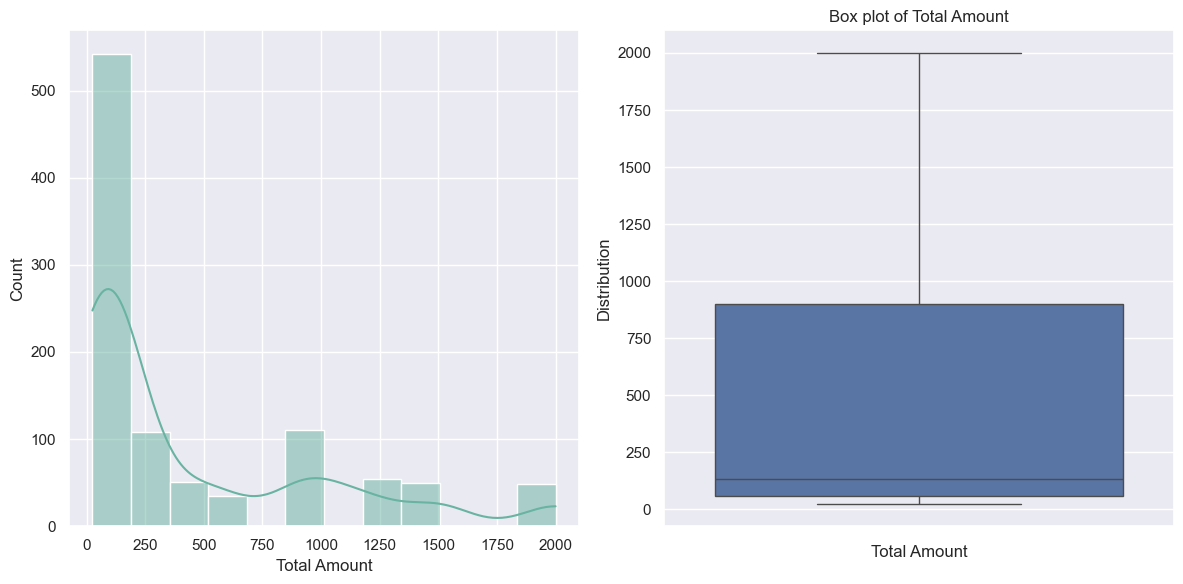

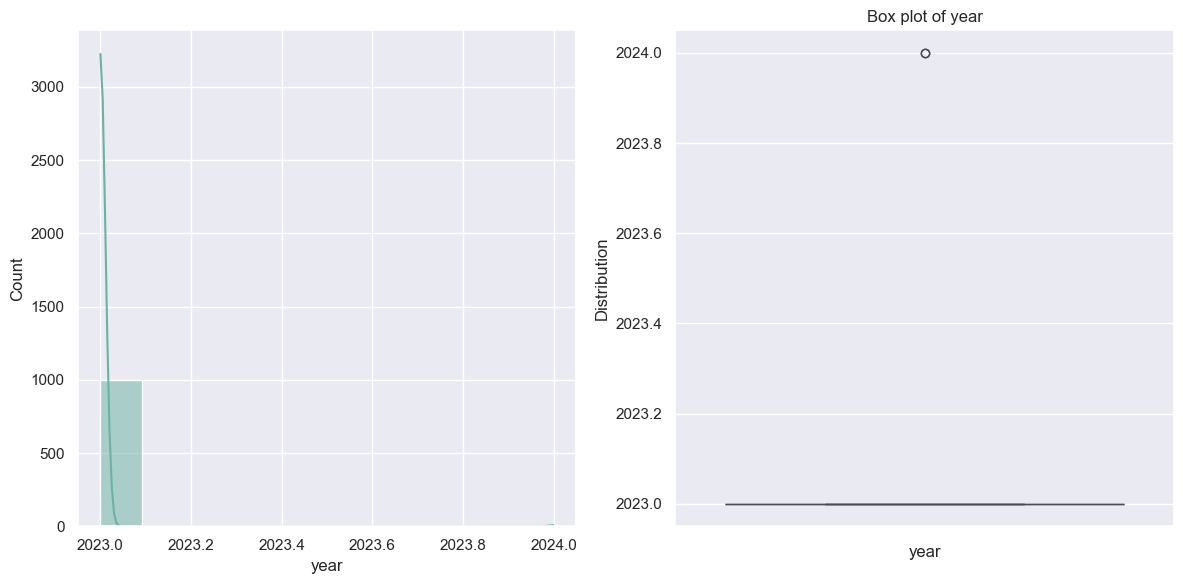

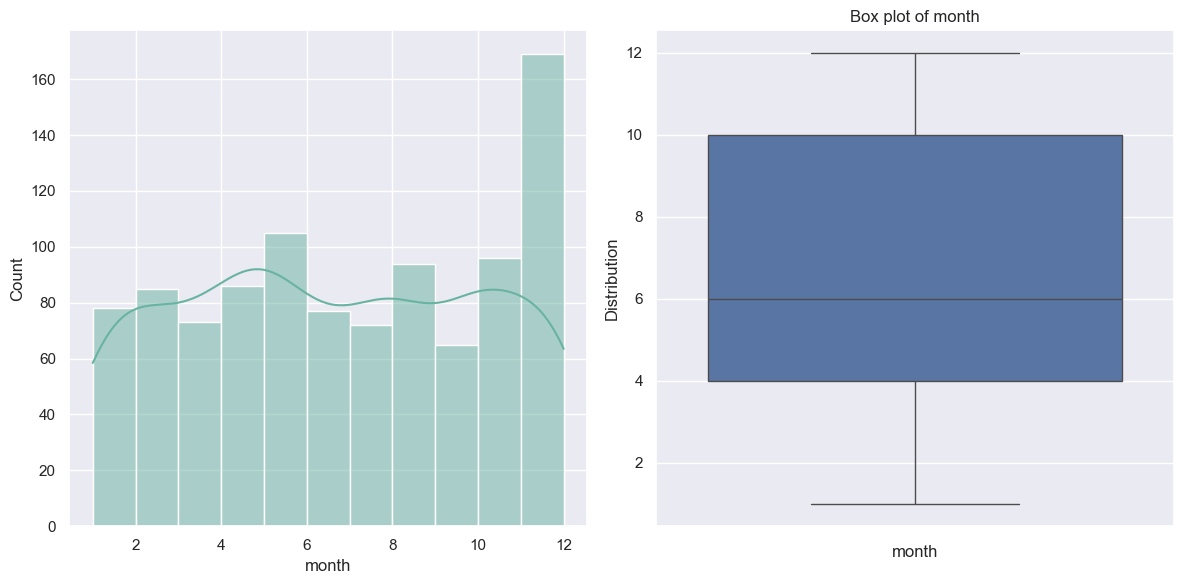

In [319]:
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,6))
    sns.histplot(data=df[[col]], x=col, color='#69b3a2', kde=True, ax=axes[0])
    plt.xlabel(col)
    plt.ylabel(f"Distribution")
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

    sns.boxplot(data=df[[col]], y=col, ax=axes[1])
    plt.xlabel(col)
    plt.ylabel('Distribution')
    plt.title(f'Box plot of {col}')
    plt.tight_layout()

- Price and Total Amount is skewed to the right &rarr; This suggest a proportions of low to mid price is larger than high-priced products.
- Overall, the other features seem normally distributed.
- December has the highest purchasing &rarr; we need to supply more resources prior to this.

Should do a log transformation for better performance of model.

In [320]:
df['log_price_per_unit'] = np.log1p(df['Price per Unit'])
df['log_total_amount'] = np.log1p(df['Total Amount'])

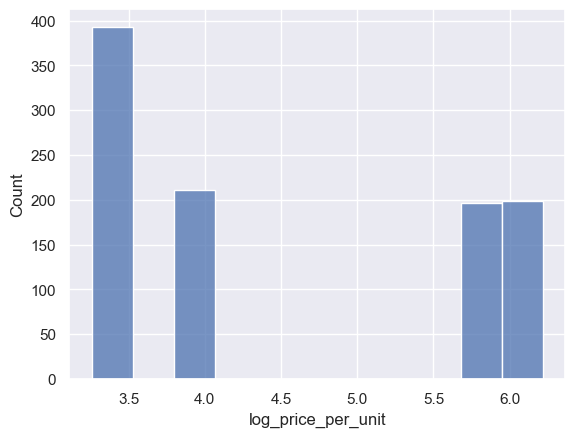

In [321]:
sns.histplot(df['log_price_per_unit'])
plt.show()

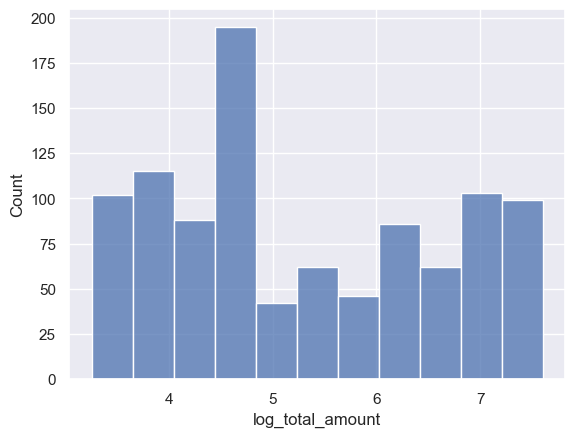

In [322]:
sns.histplot(df['log_total_amount'])
plt.show()

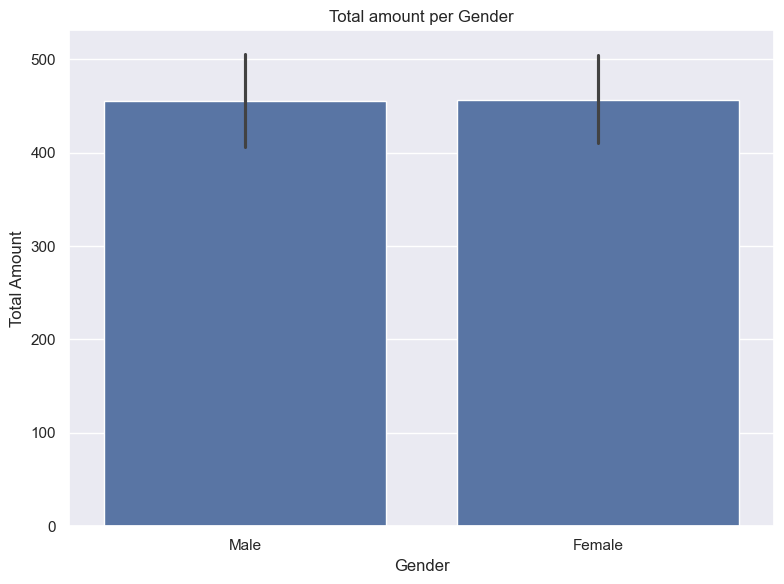

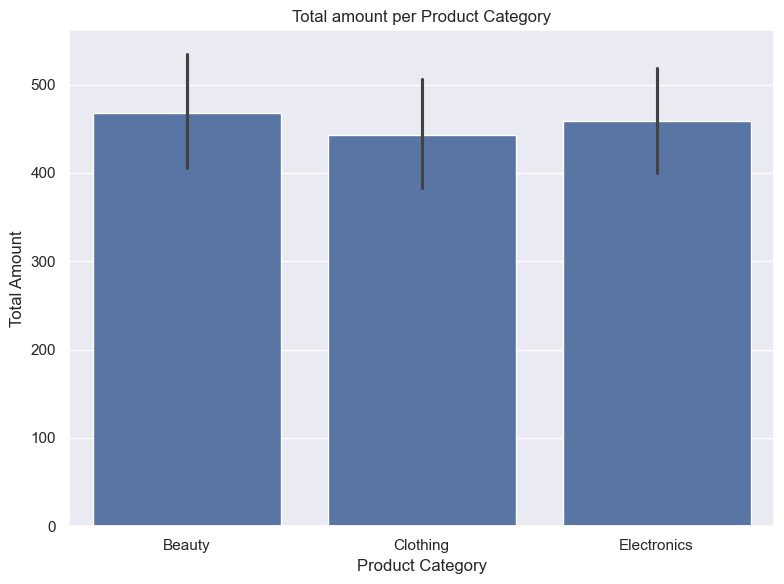

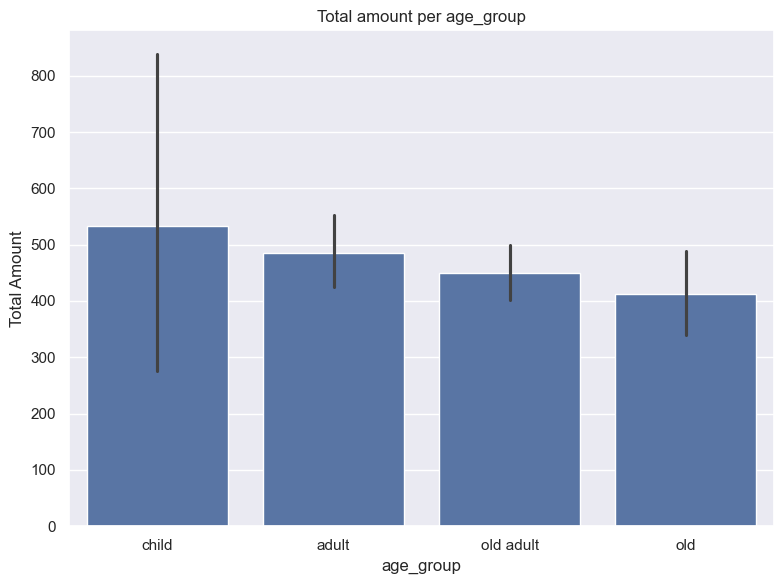

In [323]:
# Bivariate analysis with target
for col in categorical_cols:
    plt.figure(figsize=(8,6))
    sns.barplot(data=df, x=col, y='Total Amount')
    plt.xlabel(col)
    plt.ylabel('Total Amount')
    plt.title(f'Total amount per {col}')
    plt.tight_layout()

In [324]:
df.groupby('Product Category')['Total Amount'].mean().sort_values(ascending=False)

Product Category
Beauty         467.475570
Electronics    458.786550
Clothing       443.247863
Name: Total Amount, dtype: float64

In [325]:
df.groupby('age_group')['Total Amount'].std()

age_group
child        664.365523
adult        584.013412
old adult    550.833841
old          527.414257
Name: Total Amount, dtype: float64

- Gender: it seems like there is not a distinct difference.
- Product Category: Beauty is the most profitable, followed by Electronics and Clothing respectively. 
- Age Group: Child has the highest amount, but since it is unstable (standard deviation is the highest), we should focus more on adult and old adult.

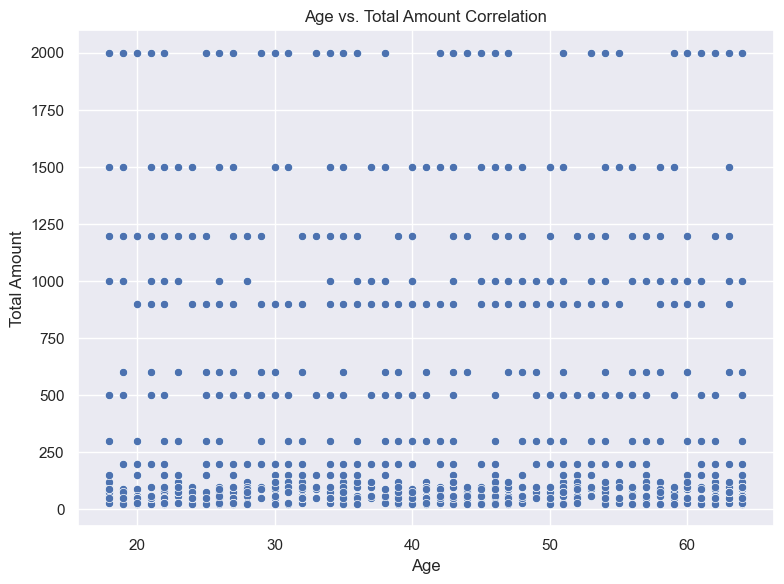

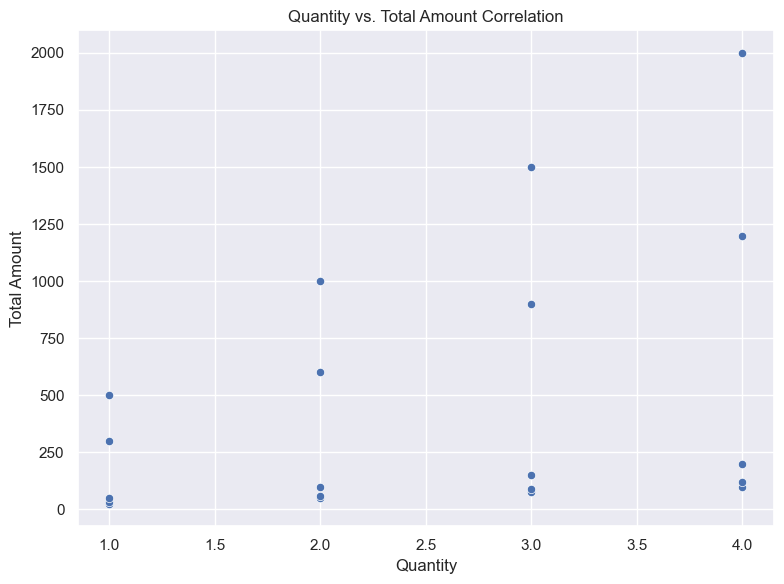

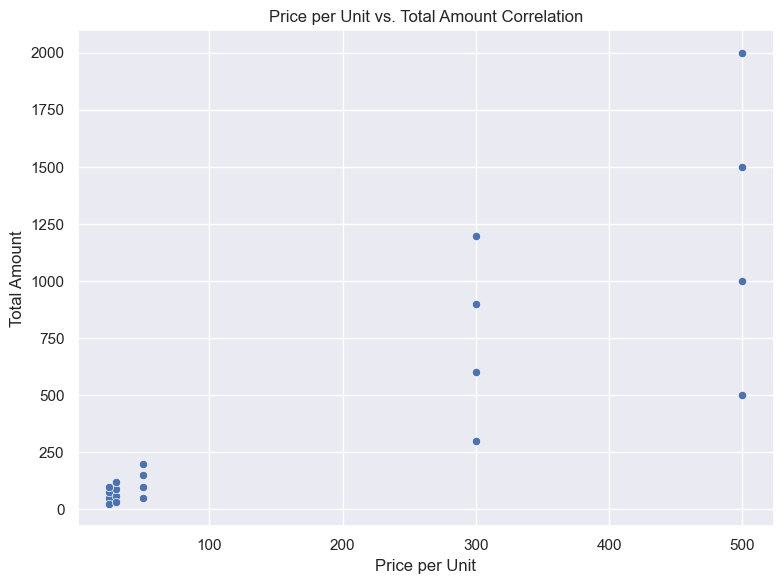

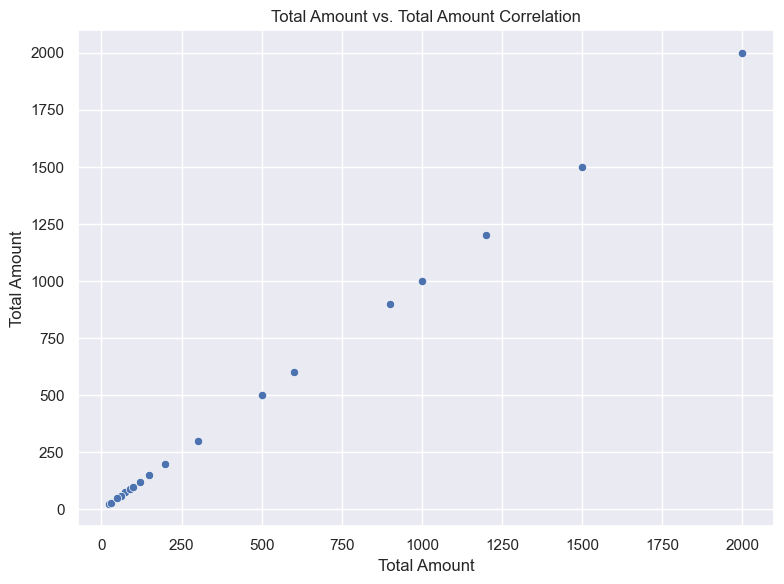

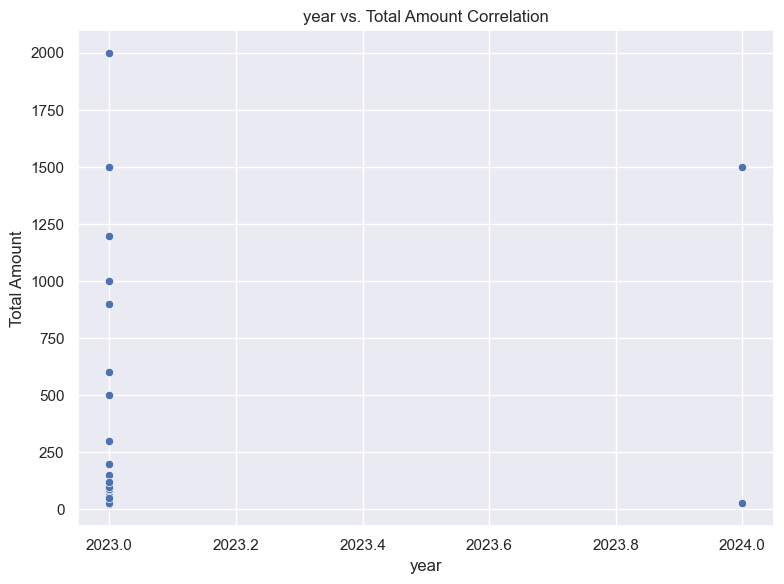

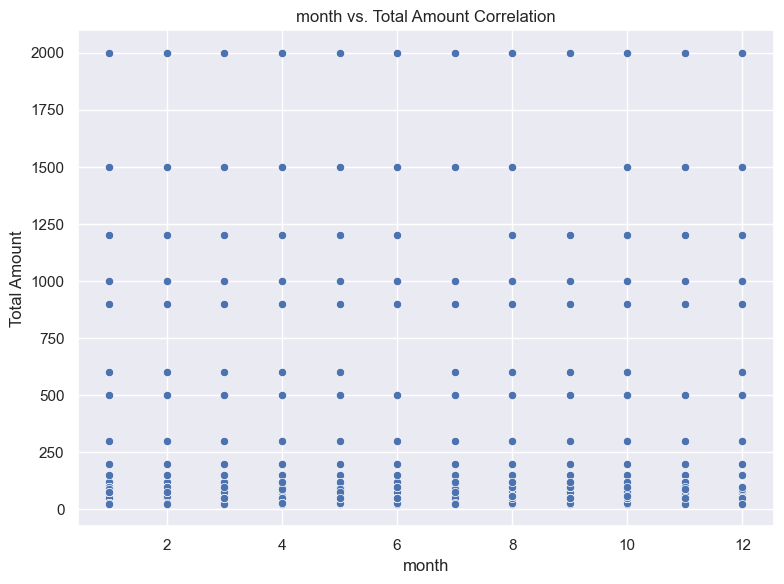

In [326]:
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=col, y='Total Amount')
    plt.xlabel(col)
    plt.ylabel('Total Amount')
    plt.title(f'{col} vs. Total Amount Correlation')
    plt.tight_layout()


Reasonably, only quantity and price per unit is correlated with the target variable.

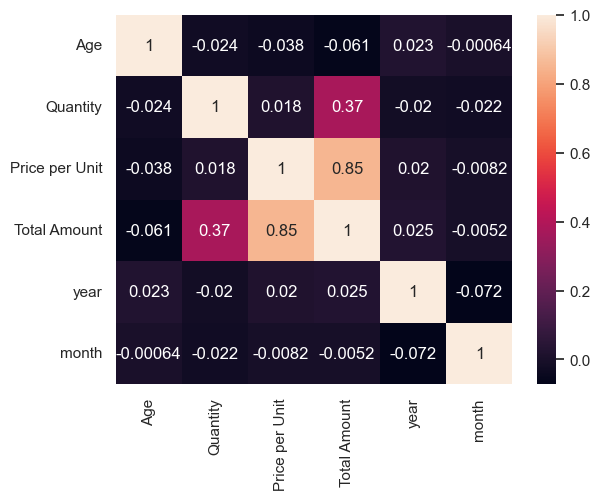

In [327]:
sns.heatmap(df[numerical_cols].corr(), annot=True)
plt.show()

In [328]:
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,age_group,year,month,log_price_per_unit,log_total_amount
Date,,,,,,,,,,,
2023-11-24,Male,34,Beauty,3,50,150,adult,2023,11,3.931826,5.017280
2023-02-27,Female,26,Clothing,2,500,1000,adult,2023,2,6.216606,6.908755
2023-01-13,Male,50,Electronics,1,30,30,old adult,2023,1,3.433987,3.433987
2023-05-21,Male,37,Clothing,1,500,500,old adult,2023,5,6.216606,6.216606
2023-05-06,Male,30,Beauty,2,50,100,adult,2023,5,3.931826,4.615121


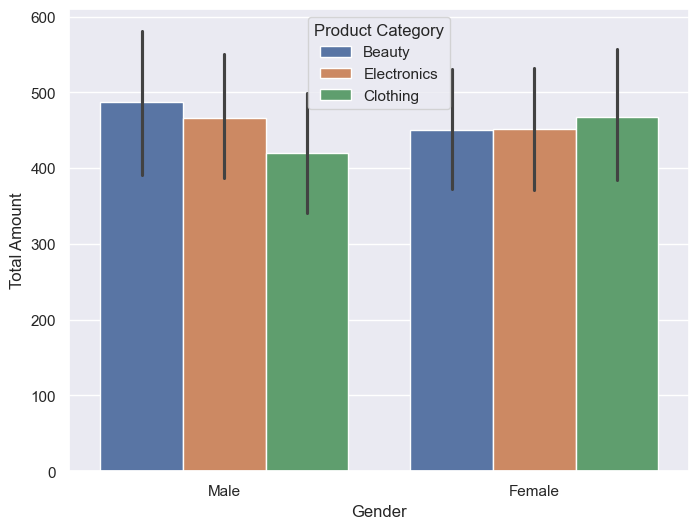

In [329]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Gender', y='Total Amount', hue='Product Category', hue_order=df.groupby('Product Category')['Total Amount'].mean().sort_values(ascending=False).index)
plt.show()

- Male: Beauty, Electronics, Clothing respectively.
- Female: Clothing, Beauty and Electronics similar.

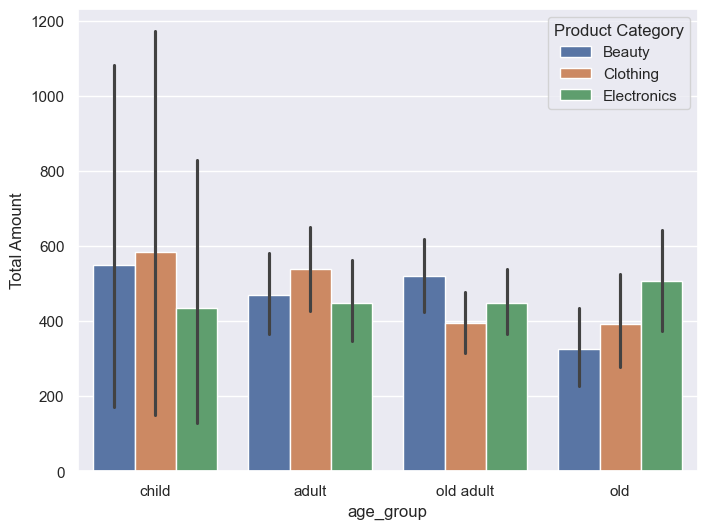

In [330]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='age_group', y='Total Amount', hue='Product Category')
plt.show()

- Child is very unstable, but highly profitable
- Adult: Clothing, Beauty, Electronics respectively.
- Old Adult: Beauty, Clothing, Electronics respectively
- Old: Electronics, Clothing, Beauty respectively.

&rarr; This all suggest the needing of supply for clothing and beauty products, and lastly electronics based on their profitable ranking.

Gender is considered not important since their total amount does not distinct, however we can tailor to specific needs such as Male with Beauty, Female with Clothing.

In order for a good ratio of supply, I will make a ratio between them and then split accordingly.

In [331]:
product_group = df.groupby('Product Category')['Total Amount'].mean().reset_index()
product_group['ratio'] = product_group['Total Amount'] / np.sum(product_group['Total Amount'])
product_group

,Product Category,Total Amount,ratio
0,Beauty,467.475570,0.341345
1,Clothing,443.247863,0.323654
2,Electronics,458.786550,0.335001


Accordingly, Beauty should amount 34.13%, Clothing 32.37%, and Electronics 33.5%

## Data Preprocessing

In [332]:
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,age_group,year,month,log_price_per_unit,log_total_amount
Date,,,,,,,,,,,
2023-11-24,Male,34,Beauty,3,50,150,adult,2023,11,3.931826,5.017280
2023-02-27,Female,26,Clothing,2,500,1000,adult,2023,2,6.216606,6.908755
2023-01-13,Male,50,Electronics,1,30,30,old adult,2023,1,3.433987,3.433987
2023-05-21,Male,37,Clothing,1,500,500,old adult,2023,5,6.216606,6.216606
2023-05-06,Male,30,Beauty,2,50,100,adult,2023,5,3.931826,4.615121


In [333]:
ohe_cols = ['Gender', 'Product Category']
cyclical_cols = ['month']
max_vals = [12]
num_cols = ['Age', 'Quantity', 'Price per Unit']

In [334]:
ohe_pipe = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder())
    ]
)

cyclical_pipe = Pipeline(
    steps=[
        ('cyclical', CyclicalEncoder(columns=cyclical_cols, max_vals=max_vals))
    ]
)

num_pipe = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

In [335]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        ('ohe', ohe_pipe, ohe_cols),
        ('cyclical', cyclical_pipe, cyclical_cols)
    ]
)

In [336]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boost': GradientBoostingRegressor(random_state=42),
    'XGB': XGBRegressor()
}

In [337]:
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,age_group,year,month,log_price_per_unit,log_total_amount
Date,,,,,,,,,,,
2023-11-24,Male,34,Beauty,3,50,150,adult,2023,11,3.931826,5.017280
2023-02-27,Female,26,Clothing,2,500,1000,adult,2023,2,6.216606,6.908755
2023-01-13,Male,50,Electronics,1,30,30,old adult,2023,1,3.433987,3.433987
2023-05-21,Male,37,Clothing,1,500,500,old adult,2023,5,6.216606,6.216606
2023-05-06,Male,30,Beauty,2,50,100,adult,2023,5,3.931826,4.615121


In [338]:
X = df[['Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'month']]
y = df['log_total_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [339]:
metrics = {
    'model': [],
    'mean': [],
    'std': []
}

In [340]:
for name, model in models.items():
    pipe = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ]
    )
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    score = np.sqrt(-scores)
    final_mean = np.mean(score)
    final_std = np.std(score)
    metrics['model'].append(name)
    metrics['mean'].append(final_mean)
    metrics['std'].append(final_std)

In [341]:
metric = pd.DataFrame(metrics)
metric['total'] = metric['mean'] + metric['std']
metric.sort_values(by='total')

,model,mean,std,total
3,Decision Tree,2.329299e-15,1.456236e-16,2.474922e-15
4,Random Forest,7.504811e-15,2.599241e-16,7.764735e-15
6,XGB,6.484793e-05,1.045811e-05,7.530604e-05
5,Gradient Boost,5.466695e-03,1.938283e-03,7.404978e-03
1,Ridge,3.185958e-01,8.555051e-03,3.271508e-01
0,Linear Regression,3.186130e-01,8.618579e-03,3.272315e-01
2,Lasso,1.173483e+00,7.114730e-02,1.244631e+00


Decision Tree has the best baseline performance, followed closely by Random Forest.

In [349]:
# DT
dt_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('dt', DecisionTreeRegressor(random_state=42))
    ]
)

dt_pipe.fit(X_train, y_train)
y_pred = dt_pipe.predict(X_test)
dt_pipe.score(X_test, y_test)

1.0

Woah, 100% correct predictions?

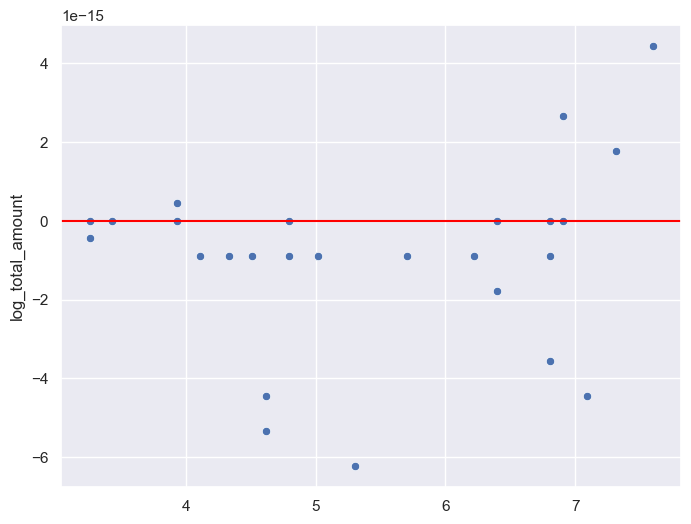

In [350]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red')
plt.show()

In [353]:
# lr
rf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('lr', RandomForestRegressor())
    ]
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

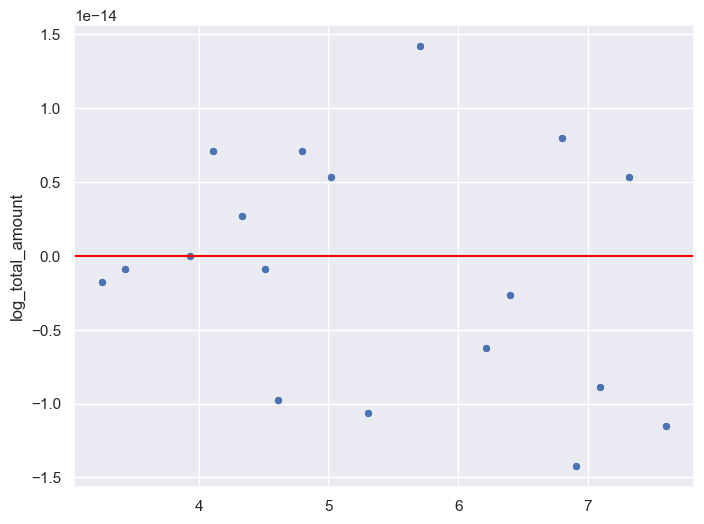

In [354]:
residuals = y_test - rf_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=rf_pred, y=residuals)
plt.axhline(0, color='red')
plt.show()